<a href="https://colab.research.google.com/github/iamdhruvsharma/CPS_DL_Project_G9/blob/main/SEP_769_CPS_Water_Quality_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEP 769: Cyber Physical System - Deep Learning - Project

### Submitted By:
####Dhruv Sharma (400349850)
####Yogesh Karlekar (400487694)

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Loading and Analyzing the Dataset

In [ ]:
#Uncomment the following line if working locally
#dataset = pd.read_csv("../data_folder/water_potability.csv.csv")

#Uncomment the following lines of code if working on google drive
#Loading the dataset from the google drive
drive.mount("/content/drive")
dataset = pd.read_csv("drive/My Drive/water-quality-dataset/water_potability.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.describe().style.background_gradient(cmap = "icefire") #For getting the overview of the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


From the above table, we can see that the values in the independent variables (columns) varies significanlty when compared to each other, hence we need to handle this variability by applying standardization to the independent variables.

In [ ]:
dataset.corr().style.background_gradient(cmap = "icefire") #For analyzing the correlation between columns

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


From the above table, we can clearly see that there is <b>NO</b> direct correlation between the independent variables (columns) and the dependent variable (Potability).

## Visualizing the Dataset and Data Distribution

In [ ]:
#Pie chart for visualizing the number of datapoints belonging to a particular class
fig = px.pie(dataset, names = "Potability", hole = 0.3, opacity = 0.6, color_discrete_sequence = px.colors.sequential.Bluered_r)
fig.update_layout(title = f"<b>Pie Chart of Potability Column</b> <br>Number of Samples: {dataset.shape[0]} <br>0: Not Potable, 1: Potable")
fig.update_traces(textposition = "outside", textinfo = "value + percent")
fig.show()

In [ ]:
#Ploting the number of null values present in the columns
missing_values_df = pd.DataFrame(dataset.isnull().sum()).T
fig = go.Figure([go.Bar(x = list(missing_values_df.columns), y = missing_values_df.iloc[0, :])])
fig.update_traces(marker_color = 'rgb(255, 102, 102)')
fig.update_layout(title_text='<b>Missing Values in Variables (Columns)</br>')
fig.update_xaxes(title_text="<b>Column Name</b>")
fig.update_yaxes(title_text="<b>Number of Missing Values</b>")
fig.show()

From the above plot, we can see that the columns: **ph, Sulfate, and Trihalomethanes** have high number of missing values. We will handle this in the later section of this notebook.

In [ ]:
#Ploting the box plots (for visaulizing variability of values) of the independent variables
cols = dataset.columns[:9]

fig = make_subplots(rows = 1, cols = len(cols))
for i, col in enumerate(cols):
    fig.add_trace(
        go.Box(y = dataset[col], name = col),
        row = 1, col = i + 1
    )

fig.update_traces(boxpoints = 'all', jitter = 0.25)
fig.update_layout(title=f"<b>Box Plots of Independent Variables</b>")

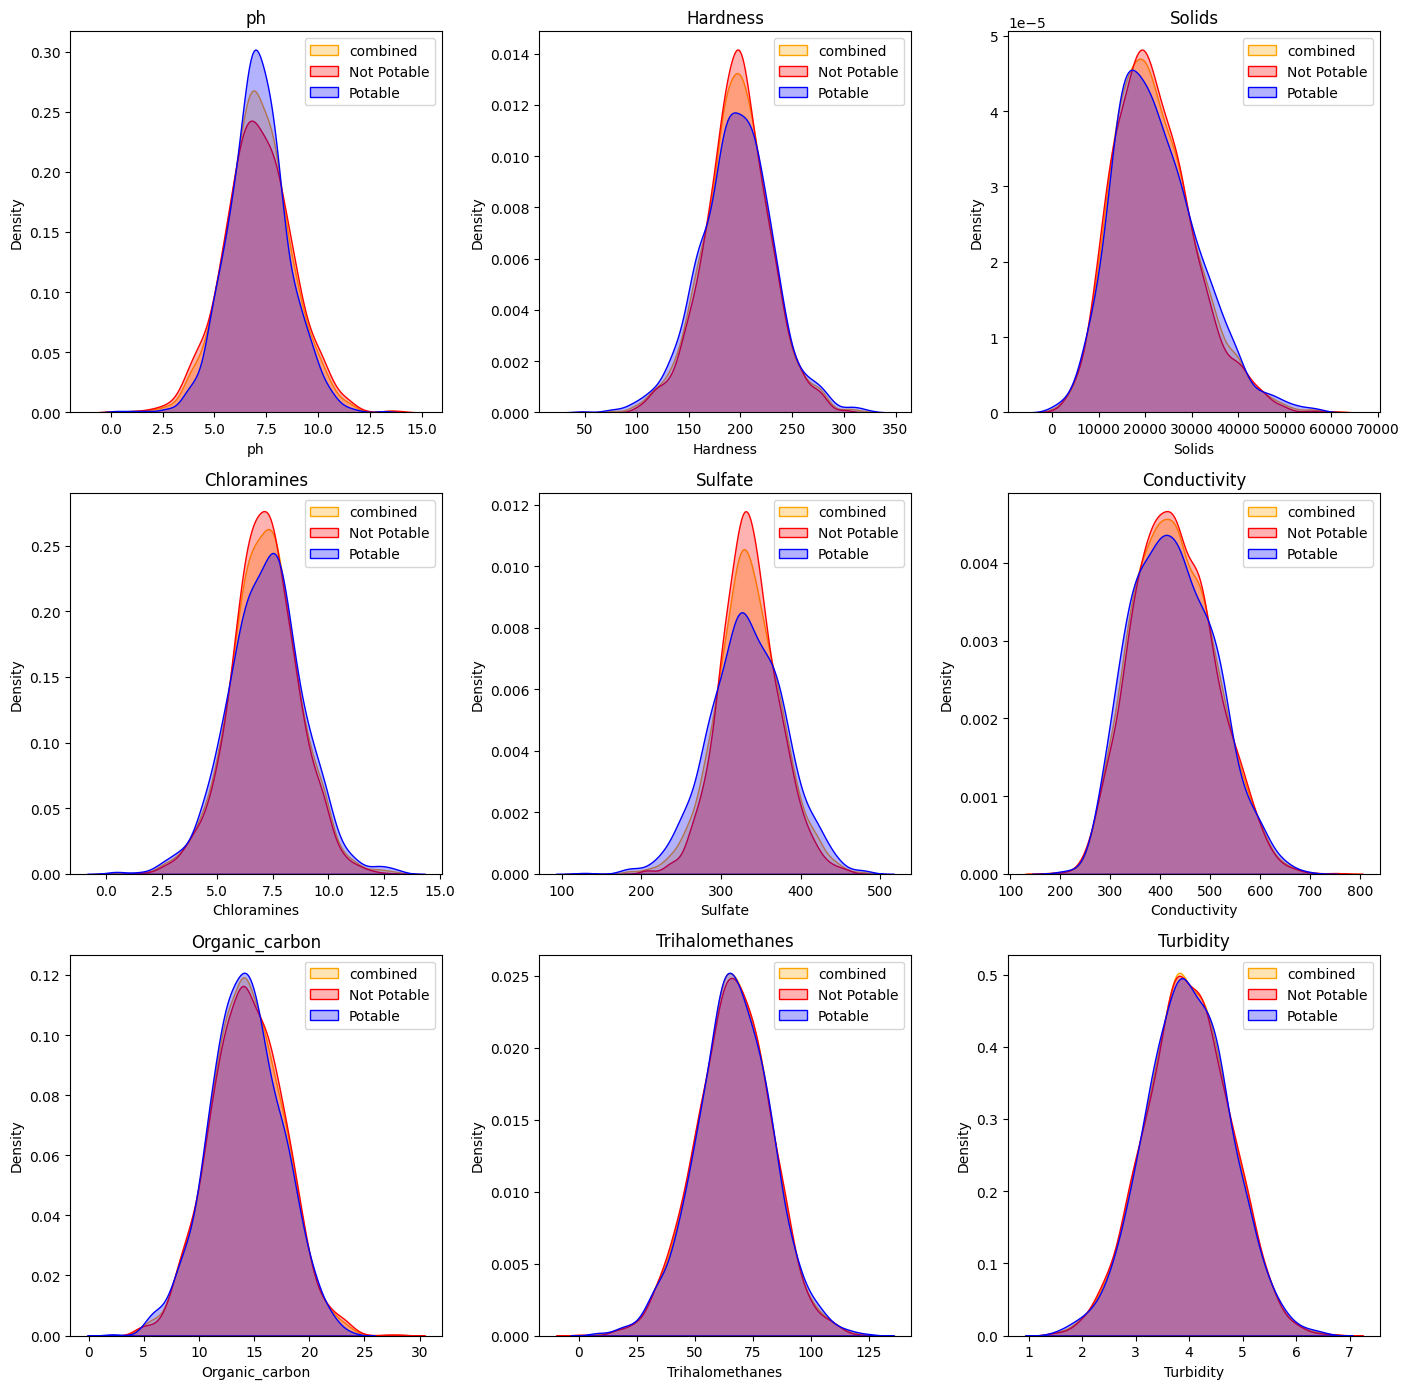

In [ ]:
#Ploting the distribution of the columns using Kernel Density Estimation (KDE)
non_potable_data = dataset.query("Potability == 0")
potable_data = dataset.query("Potability == 1")

plt.figure(figsize=(14, 14))

for row, col in enumerate(dataset.columns[:9]):
    plt.subplot(3, 3, row + 1)
    plt.title(col)
    sns.kdeplot(x = dataset[col], color = 'orange', fill = True, common_norm = False, alpha = 0.3, linewidth = 1, label = 'combined')
    sns.kdeplot(x = non_potable_data[col], label = "Not Potable", color = 'red', fill = True, common_norm = False, alpha = 0.3, linewidth = 1)
    sns.kdeplot(x = potable_data[col], label = "Potable", color = 'blue', fill = True, common_norm = False, alpha = 0.3, linewidth = 1)
    plt.legend()

plt.tight_layout()

## Pre-processing of the Dataset

###Handling missing values

From the previous sections of this notebook, we know that the columns: <b>ph, Sulfate, and Trihalomethanes </b> have high number of missing values. We also know from the previous distribution plot that these columns exhibit behaviour of <b> Gaussian or Normal distribution, </b> meaning we can fill the missing values present in these columns with <b> median or mean </b> values without disturbing the data.

In [ ]:
target_columns = ["ph", "Sulfate", "Trihalomethanes"]
for col in target_columns:
    print("Column Name: ", col, "\nmean: ", dataset[col].mean(), "median: ", dataset[col].median())

Column Name:  ph 
mean:  7.080794504276835 median:  7.036752103833548
Column Name:  Sulfate 
mean:  333.7757766108135 median:  333.073545745888
Column Name:  Trihalomethanes 
mean:  66.39629294676803 median:  66.62248509808484


Not significant difference between the mean and median values of the target columns (columns having missing values)

In [ ]:
#Handling missing values
target_columns = ["ph", "Sulfate", "Trihalomethanes"]
for col in target_columns:
    dataset[col].fillna(value = dataset[col].mean(), inplace=True)

In [ ]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

We can see from the above output, there are no more missing values present in the dataset.

###Standardizing the values of the independent variables

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.iloc[:, :9])
X = pd.DataFrame(scaled_data)
y = dataset.iloc[:, 9]

In [ ]:
X.describe().style.background_gradient(cmap = "icefire") #For getting the overview of the dataset after standardization

,0,1,2,3,4,5,6,7,8
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,1.000153,1.000153,1.000153,1.000153,1.000153,1.000153,1.000153,1.000153,1.000153
min,-4.817747,-4.530454,-2.474344,-4.277288,-5.666636,-3.028290,-3.653635,-4.164160,-3.225560
25%,-0.546441,-0.593737,-0.723992,-0.628525,-0.461607,-0.748291,-0.670919,-0.618275,-0.675510
50%,-0.000000,0.018194,-0.123900,0.005068,0.000000,-0.053459,-0.020145,0.000000,-0.015070
75%,0.537006,0.617433,0.606653,0.627106,0.459638,0.687860,0.687097,0.651361,0.683787
max,4.707802,3.855680,4.472689,3.793631,4.074895,4.048144,4.237147,3.653325,3.552921


From the above tables, we can clearly see that after standardization, data looks more consistent, stable and free from any missing values.

###Test-Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 57)

In [ ]:
X_train.shape

(2620, 9)

In [ ]:
X_test.shape

(656, 9)

##Building and Designing Different Machine Learning Models and Feedfoward Neural Network (FNN) Model

### Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state = 57)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
print("Accuracy on Training Data using Logistic Regression: ", accuracy_score(y_train, y_pred_train) * 100)
print("Accuracy on Testing Data using Logistic Regression: ", accuracy_score(y_test, y_pred_test) * 100)

cm = confusion_matrix(y_test, y_pred_test)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print("\nConfusion Matrix (Testing Data): \n", cm)
print("Pricision (Testing Data): ", TP / (TP + FP))
print("Recall (Testing Data): ", TP / (TP + FN))

Accuracy on Training Data using Logistic Regression:  61.48854961832061
Accuracy on Testing Data using Logistic Regression:  60.82317073170732

Confusion Matrix (Testing Data): 
 [[397   2]
 [255   2]]
Pricision (Testing Data):  0.5
Recall (Testing Data):  0.007782101167315175


### Support Vector Machines (SVM)

In [ ]:
classifier = svm.SVC(C = 1.0, gamma = "auto", random_state = 57)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
print("Accuracy on Training Data using SVM: ", accuracy_score(y_train, y_pred_train) * 100)
print("Accuracy on Testing Data using SVM: ", accuracy_score(y_test, y_pred_test) * 100)

cm = confusion_matrix(y_test, y_pred_test)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print("\nConfusion Matrix (Testing Data): \n", cm)
print("Pricision (Testing Data): ", TP / (TP + FP))
print("Recall (Testing Data): ", TP / (TP + FN))

Accuracy on Training Data using SVM:  72.55725190839695
Accuracy on Testing Data using SVM:  66.92073170731707

Confusion Matrix (Testing Data): 
 [[367  32]
 [185  72]]
Pricision (Testing Data):  0.6923076923076923
Recall (Testing Data):  0.2801556420233463


### K-Nearest Neighbours (KNN)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
print("Accuracy on Training Data using KNN: ", accuracy_score(y_train, y_pred_train) * 100)
print("Accuracy on Testing Data using KNN: ", accuracy_score(y_test, y_pred_test) * 100)

cm = confusion_matrix(y_test, y_pred_test)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print("\nConfusion Matrix (Testing Data): \n", cm)
print("Pricision (Testing Data): ", TP / (TP + FP))
print("Recall (Testing Data): ", TP / (TP + FN))

Accuracy on Training Data using KNN:  74.35114503816794
Accuracy on Testing Data using KNN:  63.41463414634146

Confusion Matrix (Testing Data): 
 [[354  45]
 [195  62]]
Pricision (Testing Data):  0.5794392523364486
Recall (Testing Data):  0.24124513618677043


### Naive Bayes

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
print("Accuracy on Training Data using Naive Bayes: ", accuracy_score(y_train, y_pred_train) * 100)
print("Accuracy on Testing Data using Naive Bayes: ", accuracy_score(y_test, y_pred_test) * 100)

cm = confusion_matrix(y_test, y_pred_test)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print("\nConfusion Matrix (Testing Data): \n", cm)
print("Pricision (Testing Data): ", TP / (TP + FP))
print("Recall (Testing Data): ", TP / (TP + FN))

Accuracy on Training Data using Naive Bayes:  62.97709923664122
Accuracy on Testing Data using Naive Bayes:  61.12804878048781

Confusion Matrix (Testing Data): 
 [[339  60]
 [195  62]]
Pricision (Testing Data):  0.5081967213114754
Recall (Testing Data):  0.24124513618677043


### Decision Tree

In [ ]:
classifier = DecisionTreeClassifier(max_depth = 11, random_state = 57)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
print("Accuracy on Training Data using Decision Tree: ", accuracy_score(y_train, y_pred_train) * 100)
print("Accuracy on Testing Data using Decision Tree: ", accuracy_score(y_test, y_pred_test) * 100)

cm = confusion_matrix(y_test, y_pred_test)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print("\nConfusion Matrix (Testing Data): \n", cm)
print("Pricision (Testing Data): ", TP / (TP + FP))
print("Recall (Testing Data): ", TP / (TP + FN))

Accuracy on Training Data using Decision Tree:  77.86259541984732
Accuracy on Testing Data using Decision Tree:  66.46341463414635

Confusion Matrix (Testing Data): 
 [[354  45]
 [175  82]]
Pricision (Testing Data):  0.6456692913385826
Recall (Testing Data):  0.31906614785992216


In [ ]:
fig = go.Figure([go.Bar(x = list(dataset.columns[:9]), y = classifier.feature_importances_)])
fig.update_traces(marker=dict(color = classifier.feature_importances_, colorscale='plasma'))
fig.update_layout(title_text='<b>Feature Importance (Decision Trees)</br>')
fig.update_xaxes(title_text="<b>Column Name</b>")
fig.update_yaxes(title_text="<b>Gini Importance</b>")
fig.show()

From the above plot, we can identify the top 5 most important features (Decision Trees)
<br>
1. ph
2. Hardness
3. Sulphate
4. Chloramines
5. Solids

###Random Forest

In [ ]:
classifier = RandomForestClassifier(max_depth = 11, random_state = 57)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
print("Accuracy on Training Data using Decision Tree: ", accuracy_score(y_train, y_pred_train) * 100)
print("Accuracy on Testing Data using Decision Tree: ", accuracy_score(y_test, y_pred_test) * 100)

cm = confusion_matrix(y_test, y_pred_test)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print("\nConfusion Matrix (Testing Data): \n", cm)
print("Pricision (Testing Data): ", TP / (TP + FP))
print("Recall (Testing Data): ", TP / (TP + FN))



Accuracy on Training Data using Decision Tree:  85.61068702290076
Accuracy on Testing Data using Decision Tree:  66.46341463414635

Confusion Matrix (Testing Data): 
 [[372  27]
 [193  64]]
Pricision (Testing Data):  0.7032967032967034
Recall (Testing Data):  0.2490272373540856


In [ ]:
fig = go.Figure([go.Bar(x = list(dataset.columns[:9]), y = classifier.feature_importances_)])
fig.update_traces(marker=dict(color = classifier.feature_importances_, colorscale='plasma'))
fig.update_layout(title_text='<b>Feature Importance (Random Forest)</br>')
fig.update_xaxes(title_text="<b>Column Name</b>")
fig.update_yaxes(title_text="<b>Gini Importance</b>")
fig.show()

From the above plot, we can identify the top 5 most important features (Random Forest)
<br>
1. Sulphate
2. ph
3. Hardness
4. Solids
5. Chloramines

### Feedfoward Neural Network (FNN)

In [ ]:
#Defining the model
model = Sequential()

model.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(1, activation = 'sigmoid'))

#Compiling the model
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Training the model
history = model.fit(X_train, y_train, epochs = 200, batch_size = 64, validation_data = [X_test, y_test], verbose = 1)

Epoch 1/200
41/41 [==============================] - 2s 12ms/step - loss: 0.6824 - accuracy: 0.5775 - val_loss: 0.6796 - val_accuracy: 0.6098
Epoch 2/200
41/41 [==============================] - 0s 7ms/step - loss: 0.6781 - accuracy: 0.6027 - val_loss: 0.6774 - val_accuracy: 0.6082
Epoch 3/200
41/41 [==============================] - 0s 7ms/step - loss: 0.6782 - accuracy: 0.6046 - val_loss: 0.6764 - val_accuracy: 0.6082
Epoch 4/200
41/41 [==============================] - 0s 5ms/step - loss: 0.6788 - accuracy: 0.6080 - val_loss: 0.6758 - val_accuracy: 0.6082
Epoch 5/200
41/41 [==============================] - 0s 5ms/step - loss: 0.6727 - accuracy: 0.6088 - val_loss: 0.6753 - val_accuracy: 0.6082
Epoch 6/200
41/41 [==============================] - 0s 4ms/step - loss: 0.6727 - accuracy: 0.6107 - val_loss: 0.6749 - val_accuracy: 0.6082
Epoch 7/200
41/41 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.6115 - val_loss: 0.6746 - val_accuracy: 0.6082
Epoch 8/200


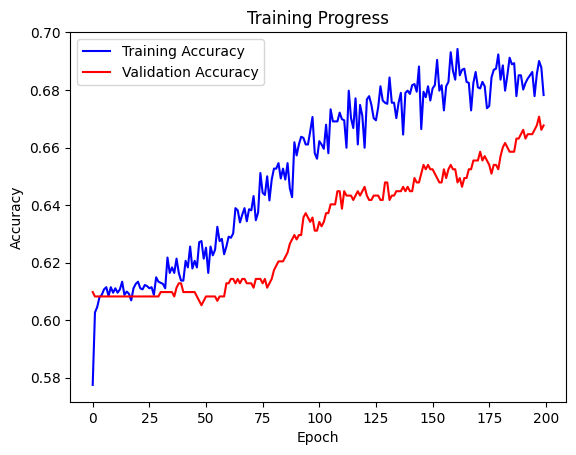

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'red', label='Validation Accuracy')
plt.title('Training Progress')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_train = np.round(y_pred_train).flatten().astype(int)

y_pred_test = model.predict(X_test)
y_pred_test = np.round(y_pred_test).flatten().astype(int)
print("Accuracy on Training Data using FNN: ", accuracy_score(y_train, y_pred_train) * 100)
print("Accuracy on Testing Data using FNN: ", accuracy_score(y_test, y_pred_test) * 100)

cm = confusion_matrix(y_test, y_pred_test)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print("\nConfusion Matrix (Testing Data): \n", cm)
print("Pricision (Testing Data): ", TP / (TP + FP))
print("Recall (Testing Data): ", TP / (TP + FN))

21/21 [==============================] - 0s 2ms/step
Accuracy on Training Data using FNN:  69.9618320610687
Accuracy on Testing Data using FNN:  66.76829268292683

Confusion Matrix (Testing Data): 
 [[342  57]
 [161  96]]
Pricision (Testing Data):  0.6274509803921569
Recall (Testing Data):  0.3735408560311284
